keyword. 분산 표현, 토큰화

# 전처리 

In [15]:
#먼저 다음 라이브러리를 준비합니다.
#konlpy 
#Mecab - 가장 빠름 정확도 높음 대용량 처리에 강함. 한국어 문장을 형태소 단위로 가장 빠르고 안정적으로 쪼개주는 형태소 분석기
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab_light_220429.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91 (from 1)
Receiving objects: 100% (138/138), 1.72 MiB | 8.36 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/home/jovyan/work/AIFFEL_quest_rs/Exploration/Ex07/Mecab-ko-for-Google-Colab/Mecab-ko-for-Google-Colab
install_mecab-ko_on_colab_light_220429.sh: line 4: cd: /content: No such file or directory
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2026-02-02 00:16:39--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 13.200.41.135, 13.200.41.136, 13.200.41.134, ...
Connecting to bitbucket.org (bitbucket.org)|13.200.41.135|:443... connected.
HTTP request sent, awaiti

In [ ]:
# 설치 후에는 세션 다시 시작, 혹은 다음 코드를 실행시켜 주세요.
import os
os.kill(os.getpid(), 9)

In [1]:
from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


#### 노이즈

In [2]:
# 노이즈 유형 (1) 문장부호 : Hi, my name is john.
def pad_punctuation(sentence, punc):
    for p in punc:
        sentence = sentence.replace(p, " " + p + " ")

    return sentence

sentence = "Hi, my-name-is-john."
print("문장부호 공백추가: ", pad_punctuation(sentence, [".", "?", "!", ","]))

# 노이즈 유형 (2) 대소문자 : First, open the first chapter.
print("소문자화: ", sentence.lower()) #소문자화
print("대문자화: ", sentence.upper()) #대문자화

# 노이즈 유형 (3) 특수문자 : He is a ten-year-old boy.
import re
sentence = re.sub("([^a-zA-Z.,?!])", " ", sentence)
print("특수문자 제거: ", sentence)

문장부호 공백추가:  Hi ,  my-name-is-john . 
소문자화:  hi, my-name-is-john.
대문자화:  HI, MY-NAME-IS-JOHN.
특수문자 제거:  Hi, my name is john.


#### 정규표현식 정의하기  
```
cleaning_test()
```

In [3]:
# From The Project Gutenberg
# (https://www.gutenberg.org/files/2397/2397-h/2397-h.htm)

corpus = \
"""
In the days that followed I learned to spell in this uncomprehending way a great many words, among them pin, hat, cup and a few verbs like sit, stand and walk.
But my teacher had been with me several weeks before I understood that everything has a name.
One day, we walked down the path to the well-house, attracted by the fragrance of the honeysuckle with which it was covered.
Some one was drawing water and my teacher placed my hand under the spout.
As the cool stream gushed over one hand she spelled into the other the word water, first slowly, then rapidly.
I stood still, my whole attention fixed upon the motions of her fingers.
Suddenly I felt a misty consciousness as of something forgotten—a thrill of returning thought; and somehow the mystery of language was revealed to me.
I knew then that "w-a-t-e-r" meant the wonderful cool something that was flowing over my hand.
That living word awakened my soul, gave it light, hope, joy, set it free!
There were barriers still, it is true, but barriers that could in time be swept away.
"""

def cleaning_text(text, punc, regex):
    # 노이즈 유형 (1) 문장부호 공백추가
    for p in punc:
        text = text.replace(p, " " + p + " ")

    # 노이즈 유형 (2), (3) 소문자화 및 특수문자 제거
    text = re.sub(regex, " ", text).lower()

    return text

print(cleaning_text(corpus, [".", ",", "!", "?"], "([^a-zA-Z0-9.,?!\n])"))


in the days that followed i learned to spell in this uncomprehending way a great many words ,  among them pin ,  hat ,  cup and a few verbs like sit ,  stand and walk . 
but my teacher had been with me several weeks before i understood that everything has a name . 
one day ,  we walked down the path to the well house ,  attracted by the fragrance of the honeysuckle with which it was covered . 
some one was drawing water and my teacher placed my hand under the spout . 
as the cool stream gushed over one hand she spelled into the other the word water ,  first slowly ,  then rapidly . 
i stood still ,  my whole attention fixed upon the motions of her fingers . 
suddenly i felt a misty consciousness as of something forgotten a thrill of returning thought  and somehow the mystery of language was revealed to me . 
i knew then that  w a t e r  meant the wonderful cool something that was flowing over my hand . 
that living word awakened my soul ,  gave it light ,  hope ,  joy ,  set it free !

# 분산표현: 바나나와 사과의 관계를 어떻게 표현할까?

- 희소표현 : 단어를 고정된 크기의 벡터로 표현하지 않고, 이진화(binary) 또는 빈도수(frequency) 등의 방식으로 표현하는 방식
  - love -> [0,1,0,0]  
- 분산표현 : 단어를 고정된 크기의 벡터로 표현하는 방식. 하나의 단어를 여러 차원의 값으로 나타낸 것이며 단어 간의 거리를 측정하여 단어 간의 의미의 관련성을 파악
  - love -> [0.03, -0.11, 0.27, ...]  

In [7]:
#희소표현 워드 벡터의 코사인 유사도 구하기

import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

word_1 = np.array([-1.0, 0.0, 0.0, 0.0]) #남자의 희소표현. 단어를 고차원 벡터로 변환
word_2 = np.array([0.0, 0.0, 1.0, 0.5]) #사과

print('남자와 사과의 유사도 :',cos_sim(word_1, word_2))

남자와 사과의 유사도 : 0.0


In [9]:
# 분산 표현: 각 단어가 몇 차원의 속성을 가질지 정의
embedding_layer = tf.keras.layers.Embedding(input_dim=100, output_dim=256) #100개의 단어를 256차원의 속성으로 표현

ModuleNotFoundError: No module named 'tensorflow'

## 토큰(Token) : 쪼개진 각 단어

### 공백 기반 토큰화

In [10]:
corpus = \
"""
in the days that followed i learned to spell in this uncomprehending way a great many words ,  among them pin ,  hat ,  cup and a few verbs like sit ,  stand and walk .
but my teacher had been with me several weeks before i understood that everything has a name .
one day ,  we walked down the path to the well house ,  attracted by the fragrance of the honeysuckle with which it was covered .
some one was drawing water and my teacher placed my hand under the spout .
as the cool stream gushed over one hand she spelled into the other the word water ,  first slowly ,  then rapidly .
i stood still ,  my whole attention fixed upon the motions of her fingers .
suddenly i felt a misty consciousness as of something forgotten a thrill of returning thought  and somehow the mystery of language was revealed to me .
i knew then that  w a t e r  meant the wonderful cool something that was flowing over my hand .
that living word awakened my soul ,  gave it light ,  hope ,  joy ,  set it free !
there were barriers still ,  it is true ,  but barriers that could in time be swept away .
"""

tokens = corpus.split()

print("문장이 포함하는 Tokens:", tokens)

문장이 포함하는 Tokens: ['in', 'the', 'days', 'that', 'followed', 'i', 'learned', 'to', 'spell', 'in', 'this', 'uncomprehending', 'way', 'a', 'great', 'many', 'words', ',', 'among', 'them', 'pin', ',', 'hat', ',', 'cup', 'and', 'a', 'few', 'verbs', 'like', 'sit', ',', 'stand', 'and', 'walk', '.', 'but', 'my', 'teacher', 'had', 'been', 'with', 'me', 'several', 'weeks', 'before', 'i', 'understood', 'that', 'everything', 'has', 'a', 'name', '.', 'one', 'day', ',', 'we', 'walked', 'down', 'the', 'path', 'to', 'the', 'well', 'house', ',', 'attracted', 'by', 'the', 'fragrance', 'of', 'the', 'honeysuckle', 'with', 'which', 'it', 'was', 'covered', '.', 'some', 'one', 'was', 'drawing', 'water', 'and', 'my', 'teacher', 'placed', 'my', 'hand', 'under', 'the', 'spout', '.', 'as', 'the', 'cool', 'stream', 'gushed', 'over', 'one', 'hand', 'she', 'spelled', 'into', 'the', 'other', 'the', 'word', 'water', ',', 'first', 'slowly', ',', 'then', 'rapidly', '.', 'i', 'stood', 'still', ',', 'my', 'whole', 'attenti

### 형태소 기반 토큰화

분석기 추천  
- 100만 문장, 빠른 속도 -> mecab
- 느려도 정확도, 띄어쓰기, 오탈자 -> KOMORAN + mecab, 꼬꼬마

In [11]:
from konlpy.tag import Hannanum,Kkma,Komoran,Mecab,Okt

In [12]:
from konlpy.tag import Mecab
mecab = Mecab()
print(mecab.morphs("테스트 문장입니다."))

['테스트', '문장', '입니다', '.']


In [13]:
! pip install konlpy
! cd ~/work/text_preprocess
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
! cd Mecab-ko-for-Google-Colab
! bash install_mecab-ko_on_colab190912.sh

/bin/bash: line 1: cd: /home/jovyan/work/text_preprocess: No such file or directory
fatal: destination path 'Mecab-ko-for-Google-Colab' already exists and is not an empty directory.
bash: install_mecab-ko_on_colab190912.sh: No such file or directory


In [14]:
! sudo apt update
! sudo apt install -y default-jre #-y 꼭 붙이기 → 중간에 [Y/n] 물어보지 않음

Hit:1 http://security.ubuntu.com/ubuntu noble-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu noble InRelease
Hit:3 http://archive.ubuntu.com/ubuntu noble-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu noble-backports InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
96 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  adwaita-icon-theme at-spi2-common at-spi2-core bsdutils ca-certificates-java
  dbus dbus-bin dbus-daemon dbus-session-bus-common dbus-system-bus-common
  dbus-user-session dconf-gsettings-backend dconf-service default-jre-headless
  dmsetup fonts-dejavu-core fonts-dejavu-extra fonts-dejavu-mono
  gir1.2-girepository-2.0 gir1.2-glib-2.0 gsettings-desktop-schemas
  gtk-update-icon-cache hicolor-icon-theme humanity-icon-theme java-c

In [15]:
tokenizer_list = [Hannanum(),Kkma(),Komoran(),Mecab(),Okt()]

kor_text = '코로나바이러스는 2019년 12월 중국 우한에서 처음 발생한 뒤 전 세계로 확산된, 새로운 유형의 호흡기 감염 질환입니다.'

for tokenizer in tokenizer_list:
    print('[{}] \n{}'.format(tokenizer.__class__.__name__, tokenizer.pos(kor_text)))

[Hannanum] 
[('코로나바이러스', 'N'), ('는', 'J'), ('2019년', 'N'), ('12월', 'N'), ('중국', 'N'), ('우한', 'N'), ('에서', 'J'), ('처음', 'M'), ('발생', 'N'), ('하', 'X'), ('ㄴ', 'E'), ('뒤', 'N'), ('전', 'N'), ('세계', 'N'), ('로', 'J'), ('확산', 'N'), ('되', 'X'), ('ㄴ', 'E'), (',', 'S'), ('새롭', 'P'), ('은', 'E'), ('유형', 'N'), ('의', 'J'), ('호흡기', 'N'), ('감염', 'N'), ('질환', 'N'), ('이', 'J'), ('ㅂ니다', 'E'), ('.', 'S')]
[Kkma] 
[('코로나', 'NNG'), ('바', 'NNG'), ('이러', 'MAG'), ('슬', 'VV'), ('는', 'ETD'), ('2019', 'NR'), ('년', 'NNM'), ('12', 'NR'), ('월', 'NNM'), ('중국', 'NNG'), ('우', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('에', 'VV'), ('서', 'ECD'), ('처음', 'NNG'), ('발생', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('뒤', 'NNG'), ('전', 'NNG'), ('세계', 'NNG'), ('로', 'JKM'), ('확산', 'NNG'), ('되', 'XSV'), ('ㄴ', 'ETD'), (',', 'SP'), ('새', 'NNG'), ('롭', 'XSA'), ('ㄴ', 'ETD'), ('유형', 'NNG'), ('의', 'JKG'), ('호흡기', 'NNG'), ('감염', 'NNG'), ('질환', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN'), ('.', 'SF')]
[Komoran] 
[('코로나바이러스', 'NNP'), ('는', 'JX'), ('2019', 'SN'

### OOV(Out-Of-Vocabulary) : 사전에 없는 단어의 문제

```
코로나바이러스는 2019년 12월 중국 우한에서 처음 발생한 뒤
전 세계로 확산된, 새로운 유형의 호흡기 감염 질환입니다.
→
<unk>는 2019년 12월 중국 <unk>에서 처음 발생한 뒤
전 세계로 확산된, 새로운 유형의 호흡기 감염 질환입니다. 
```

- Byte Pair Encoding(BPE) : 새로운 단어로 치환하여 압축하는 작업을 반복하는 방식
- Wordpiece Model(WPM) : 한 단어를 여러 개의 Subword의 집합으로 보는 방법
  - 공백 복원을 위해 단어의 시작 부분에 언더바 _ 를 추가합니다.
  - 빈도수 기반이 아닌 가능도(Likelihood)를 증가시키는 방향으로 문자 쌍을 합칩니다. (더 '그럴듯한' 토큰을 만들어냅니다.)

#### BPE

In [16]:
import re, collections

# 임의의 데이터에 포함된 단어들입니다.
# 우측의 정수는 임의의 데이터에 해당 단어가 포함된 빈도수입니다.
vocab = {
    'l o w '      : 5,
    'l o w e r '  : 2,
    'n e w e s t ': 6,
    'w i d e s t ': 3
}

num_merges = 5

def get_stats(vocab):
    """
    단어 사전을 불러와
    단어는 공백 단위로 쪼개어 문자 list를 만들고
    빈도수와 쌍을 이루게 합니다. (symbols)
    """
    pairs = collections.defaultdict(int)

    for word, freq in vocab.items():
        symbols = word.split()

        for i in range(len(symbols) - 1):             # 모든 symbols를 확인하여
            pairs[symbols[i], symbols[i + 1]] += freq  # 문자 쌍의 빈도수를 저장합니다.

    return pairs

def merge_vocab(pair, v_in):
    """
    문자 쌍(pair)과 단어 리스트(v_in)를 입력받아
    각각의 단어에서 등장하는 문자 쌍을 치환합니다.
    (하나의 글자처럼 취급)
    """
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')

    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]

    return v_out, pair[0] + pair[1]

token_vocab = []

for i in range(num_merges):
    print(">> Step {0}".format(i + 1))

    pairs = get_stats(vocab)
    best = max(pairs, key=pairs.get)  # 가장 많은 빈도수를 가진 문자 쌍을 반환합니다.
    vocab, merge_tok = merge_vocab(best, vocab)
    print("다음 문자 쌍을 치환:", merge_tok)
    print("변환된 Vocab:\n", vocab, "\n")

    token_vocab.append(merge_tok)

print("Merged Vocab:", token_vocab)

>> Step 1
다음 문자 쌍을 치환: es
변환된 Vocab:
 {'l o w ': 5, 'l o w e r ': 2, 'n e w es t ': 6, 'w i d es t ': 3} 

>> Step 2
다음 문자 쌍을 치환: est
변환된 Vocab:
 {'l o w ': 5, 'l o w e r ': 2, 'n e w est ': 6, 'w i d est ': 3} 

>> Step 3
다음 문자 쌍을 치환: lo
변환된 Vocab:
 {'lo w ': 5, 'lo w e r ': 2, 'n e w est ': 6, 'w i d est ': 3} 

>> Step 4
다음 문자 쌍을 치환: low
변환된 Vocab:
 {'low ': 5, 'low e r ': 2, 'n e w est ': 6, 'w i d est ': 3} 

>> Step 5
다음 문자 쌍을 치환: ne
변환된 Vocab:
 {'low ': 5, 'low e r ': 2, 'ne w est ': 6, 'w i d est ': 3} 

Merged Vocab: ['es', 'est', 'lo', 'low', 'ne']


#### WPM

## 토큰에게 의미를 부여하기

### Word2Vec - CBOW vs. skip-gram. skip-gram이 더 우세함

### FastText

### ELMo - the 1st Contextualized Word Embedding  

- 입력 단어 표현 벡터 (Token Embedding)  
- 정방향 LSTM 은닉 상태 벡터 (Forward LSTM hidden state)  
- 역방향 LSTM 은닉 상태 벡터 (Backward LSTM hidden state)  

# [프로젝트] 멋진 단어사전 만들기

In [17]:
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab_light_220429.sh

fatal: destination path 'Mecab-ko-for-Google-Colab' already exists and is not an empty directory.
/home/jovyan/work/AIFFEL_quest_rs/Exploration/Ex07/Mecab-ko-for-Google-Colab
install_mecab-ko_on_colab_light_220429.sh: line 4: cd: /content: No such file or directory
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2026-02-02 00:19:37--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 13.200.41.135, 13.200.41.136, 13.200.41.134, ...
Connecting to bitbucket.org (bitbucket.org)|13.200.41.135|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2026-02-02 00:19:37 ERROR 404: Not Found.

Done
Unpacking mecab-0.996-ko-0.9.2.tar.gz.......
Done
Change Directory to mecab-0.996-ko-0.9.2.......
install_mecab-ko_on_colab_light_220429.sh: line 23: cd: mecab-0.996-ko-0.9.2/: No such file or directory
inst

In [18]:
from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


## 데이터 다운로드 및 분석

In [16]:
import os

import matplotlib.pyplot as plt
import torch
import numpy as np

%matplotlib inline

In [20]:
!wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
!tar -xzvf korean-english-park.train.tar.gz

--2026-02-02 00:19:46--  https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz [following]
--2026-02-02 00:19:47--  https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8718893 (8.3M) [application/octet-stream]
Saving to: ‘korean-english-park.train.tar.gz.1’

korean

In [14]:
import os
path_to_file = "korean-english-park.train.ko"

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


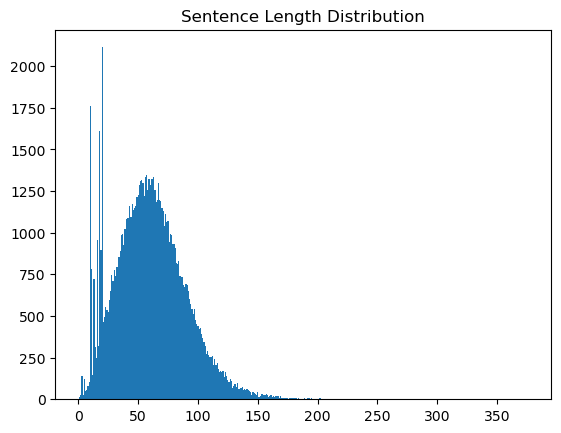

In [17]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [18]:
def check_sentence_with_length(raw, length):
    count = 0

    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)

’


In [19]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


In [20]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


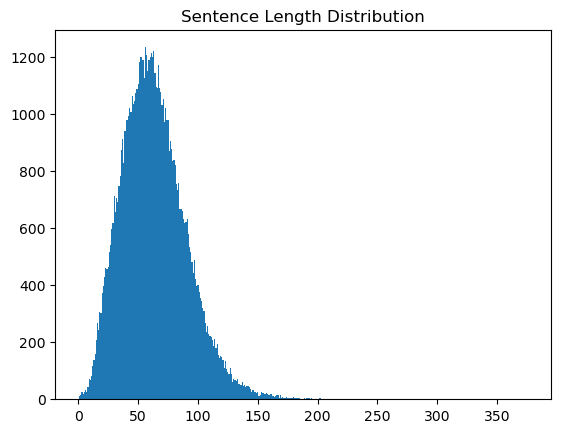

In [21]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

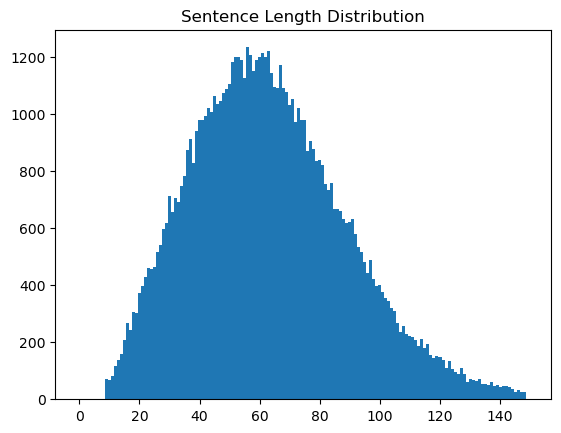

In [22]:
#지나치게 긴 데이터를 삭제 (연산량을 감소시켜 학습 속도가 빨라집니다!)
#지나치게 짧은 데이터를 검증을 통해 데이터를 얼마나 사용할지 타협점을 정의함

max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

## 토큰화

### 공백기반 토큰화 

이전 스텝에서 얻은 정제된 데이터 filtered_corpus를 공백 기반으로 토큰화하여 리스트 split_corpus에 저장한 후, 아래 tokenize() 함수를 사용해 단어 사전과 Tensor 데이터를 얻으세요! 그리고 단어 사전의 크기를 확인하세요!

In [28]:
import torch
from torch.nn.utils.rnn import pad_sequence

class Tokenizer:
    def __init__(self, filters=''):
        self.word_index = {}
        self.index_word = {}
        self.filters = filters

    def fit_on_texts(self, corpus):
        # 각 문장을 토큰화하여 단어 사전을 생성 (인덱스는 1부터 시작)
        for sentence in corpus:
            tokens = sentence.split() if isinstance(sentence, str) else sentence
            for token in tokens:
                if token not in self.word_index:
                    self.word_index[token] = len(self.word_index) + 1
        # 역방향 사전 생성
        self.index_word = {idx: word for word, idx in self.word_index.items()}

    def texts_to_sequences(self, corpus):
        sequences = []
        for sentence in corpus:
            tokens = sentence.split() if isinstance(sentence, str) else sentence
            # 존재하지 않는 단어는 0으로 처리
            seq = [self.word_index.get(token, 0) for token in tokens]
            sequences.append(torch.tensor(seq, dtype=torch.long))
        return sequences

    def sequences_to_texts(self, sequences):
        texts = []
        for seq in sequences:
            # tensor인 경우 리스트로 변환
            if isinstance(seq, torch.Tensor):
                seq = seq.tolist()
            # 패딩 토큰(0)은 제외하고 디코딩
            tokens = [self.index_word.get(idx, "") for idx in seq if idx != 0]
            texts.append(tokens)
        return texts

In [29]:
def tokenize(corpus):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(corpus)
    sequences = tokenizer.texts_to_sequences(corpus)
    # padding 토큰은 0
    tensor = pad_sequence(sequences, batch_first=True, padding_value=0)
    return tensor, tokenizer

In [30]:
# 정제된 데이터 filtered_corpus를 공백 기반으로 토큰화하여 저장하는 코드를 직접 작성해 보세요.
split_corpus = []

for kor in filtered_corpus:
    split_corpus.append(kor.split())

In [31]:
len(split_corpus)

76908

In [32]:
split_tensor, split_tokenizer = tokenize(split_corpus)

print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 238305


In [33]:
for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 10: break

0 : 미시시피
1 : 경선에는
2 : 모두
3 : 33명의
4 : 대의원이
5 : 걸려있다.
6 : 에후드
7 : 올메르트
8 : 이스라엘
9 : 총리는
10 : 워싱턴에서의
11 : 평화회담


### 형태소기반 토큰화

In [34]:
# 위에서 사용한 코드를 활용해 MeCab 단어 사전을 만들어보세요.
# Hint : mecab.morphs()를 사용해서 형태소분석을 합니다.
def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

In [35]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 53642


In [36]:
# Case 1 : tokenizer.sequences_to_texts()

texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(texts[0])

['그', '들', '은', '미국', '의', '경쟁', '기업', '들', '과', '는', '달리', '학계', '의', '기라', '성', '같', '은', '우수', '한', '인재', '들', '을', '거의', '끌', '어', '들', '이', '지', '못했', '다', '.']


In [37]:
# Case 2 : tokenizer.index_word

sentence = ""

for w in mecab_tensor[100]:
    w = int(w)
    if w == 0: continue
    sentence += mecab_tokenizer.index_word[w] + " "

print(sentence)

그 들 은 미국 의 경쟁 기업 들 과 는 달리 학계 의 기라 성 같 은 우수 한 인재 들 을 거의 끌 어 들 이 지 못했 다 . 


In [38]:
import torch
from torch.nn.utils.rnn import pad_sequence
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import konlpy

print(torch.__version__)
print(np.__version__)
print(matplotlib.__version__)
print(konlpy.__version__)

2.7.1+cu118
2.2.6
3.10.3
0.6.0


## 프로젝트: SentencePiece 사용하기

### step 1. SentencePiece 설치하기  
[다양한 sentencepiece 옵션](https://github.com/google/sentencepiece/blob/master/doc/options.md) 

In [39]:
! pip install sentencepiece

### step2. 모델 학습

In [35]:

class Tokenizer:
    def __init__(self, filters=''):
        self.word_index = {}
        self.index_word = {}
        self.filters = filters

    def fit_on_texts(self, corpus):
        for sentence in corpus:
            tokens = sentence.split() if isinstance(sentence, str) else sentence
            for token in tokens:
                if token not in self.word_index:
                    self.word_index[token] = len(self.word_index) + 1
        self.index_word = {idx: word for word, idx in self.word_index.items()}

    def texts_to_sequences(self, corpus):
        sequences = []
        for sentence in corpus:
            tokens = sentence.split() if isinstance(sentence, str) else sentence
            seq = [self.word_index.get(token, 0) for token in tokens]
            sequences.append(torch.tensor(seq, dtype=torch.long))
        return sequences

    def sequences_to_texts(self, sequences):
        texts = []
        for seq in sequences:
            if isinstance(seq, torch.Tensor):
                seq = seq.tolist()
            tokens = [self.index_word.get(idx, "") for idx in seq if idx != 0]
            texts.append(tokens)
        return texts

def tokenize(corpus):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(corpus)
    sequences = tokenizer.texts_to_sequences(corpus)
    tensor = pad_sequence(sequences, batch_first=True, padding_value=0)
    return tensor, tokenizer

In [36]:
import sentencepiece as spm
import os
temp_file = 'korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전에 나왔던 정제했던 corpus를 활용해서 진행해야 합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = unigram이 디폴트 적용되어 있습니다. --model_type = bpe로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

-rw-rw-r-- 1 jovyan users 379826 Feb  2 00:42 korean_spm.model
-rw-rw-r-- 1 jovyan users 146754 Feb  2 00:42 korean_spm.vocab


sentencepiece_trainer.cc(178) LOG(INFO) Running command: --input=korean-english-park.train.ko.temp --model_prefix=korean_spm --vocab_size=8000
sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  b

In [44]:
sp = spm.SentencePieceProcessor()
sp.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = sp.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(sp.SampleEncodeAsPieces('아버지가방에들어가신다.',-1, 0.1))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1246, 11, 302, 7, 3541, 11, 287, 33, 4]
['▁', '아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


### step 3. Tokenizer 함수 작성

In [45]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({word:idx})
        index_word.update({idx:word})

    tensor = pad_sequence(tensor, batch_first=True, padding_value=0)

    return tensor, word_index, index_word

### step 4. 네이버 영화리뷰 감정 분석 문제에 SentencePiece 적용해 보기

#### 환경설정

In [2]:
!wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
!wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt
!mv ratings_*.txt ~/work/sentiment_classification/data

--2026-02-02 00:30:45--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14628807 (14M) [text/plain]
Saving to: ‘ratings_train.txt.4’

ratings_train.txt.4 100%[===================>]  13.95M  39.7MB/s    in 0.4s    

2026-02-02 00:30:45 (39.7 MB/s) - ‘ratings_train.txt.4’ saved [14628807/14628807]

--2026-02-02 00:30:46--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4893335 (4.7M) [application/o

In [3]:
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab_light_220429.sh

fatal: destination path 'Mecab-ko-for-Google-Colab' already exists and is not an empty directory.
/home/jovyan/work/AIFFEL_quest_rs/Exploration/Ex07/Mecab-ko-for-Google-Colab
install_mecab-ko_on_colab_light_220429.sh: line 4: cd: /content: No such file or directory
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2026-02-02 00:30:57--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 13.200.41.135, 13.200.41.136, 13.200.41.134, ...
Connecting to bitbucket.org (bitbucket.org)|13.200.41.135|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2026-02-02 00:30:58 ERROR 404: Not Found.

Done
Unpacking mecab-0.996-ko-0.9.2.tar.gz.......
Done
Change Directory to mecab-0.996-ko-0.9.2.......
install_mecab-ko_on_colab_light_220429.sh: line 23: cd: mecab-0.996-ko-0.9.2/: No such file or directory
inst

In [4]:
!pip install gensim==4.3.2

In [5]:
# 의존성 연결을 위해 다운그레이드를 진행합니다.
!pip install scipy==1.12.0 numpy==1.26.3

In [6]:
import pandas
import konlpy
import gensim

print(pandas.__version__)
print(konlpy.__version__)
print(gensim.__version__)

2.3.0
0.6.0
4.3.2


#### 데이터셋

In [49]:
import pandas as pd
import os
import torch
from torch.nn.utils.rnn import pad_sequence
import sentencepiece as spm

In [48]:
sp = spm.SentencePieceProcessor()
sp.load("korean_spm.model")

True

In [72]:
import pandas as pd
import os
from konlpy.tag import Mecab
import numpy as np
from collections import Counter

# 데이터를 읽어봅시다.
train_data = pd.read_table(os.getenv("HOME") + '/work/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table(os.getenv("HOME") + '/work/sentiment_classification/data/ratings_test.txt')

import torch
from torch.nn.utils.rnn import pad_sequence
import numpy as np

def load_data_sp(
    train_data,
    test_data,
    sp,
    pad_id=0,
    std_factor=3
):
    # 1. 중복 제거 + 결측 제거
    train_data = train_data.drop_duplicates(subset=["document"]).dropna()
    test_data = test_data.drop_duplicates(subset=["document"]).dropna()

    # 2. SentencePiece encoding (list of list)
    train_encoded = [
        sp.encode(sent, out_type=int)
        for sent in train_data["document"]
    ]
    test_encoded = [
        sp.encode(sent, out_type=int)
        for sent in test_data["document"]
    ]

    # 3. 길이 계산
    train_lengths = np.array([len(x) for x in train_encoded])

    # 4. 길이 0 제거
    valid_idx = train_lengths > 0
    train_encoded = [x for x, v in zip(train_encoded, valid_idx) if v]
    y_train = train_data["label"].values[valid_idx]

    # 5. 평균 + 3 * 표준편차 기준 max_len
    mean_len = train_lengths[valid_idx].mean()
    std_len = train_lengths[valid_idx].std()
    max_len = int(mean_len + std_factor * std_len)

    # 6. 길이 자르기 (truncate)
    train_encoded = [x[:max_len] for x in train_encoded]

    # === test 데이터 ===
    test_encoded = [x for x in test_encoded if len(x) > 0]
    test_encoded = [x[:max_len] for x in test_encoded]

    # 7. tensor + padding
    X_train = pad_sequence(
        [torch.tensor(x, dtype=torch.long) for x in train_encoded],
        batch_first=True,
        padding_value=pad_id
    )
    X_test = pad_sequence(
        [torch.tensor(x, dtype=torch.long) for x in test_encoded],
        batch_first=True,
        padding_value=pad_id
    )

    y_train = torch.tensor(y_train, dtype=torch.long)
    y_test = torch.tensor(
        test_data.loc[test_data["document"].str.len() > 0, "label"].values,
        dtype=torch.long
    )

    return X_train, y_train, X_test, y_test, max_len


In [81]:
X_train, y_train, X_test, y_test, max_len = load_data_sp(train_data, test_data, sp)


In [82]:
#Embedding layer 크기
sp.get_piece_size()


8000

In [74]:
#padding id 확인
sp.pad_id(), sp.unk_id(), sp.bos_id(), sp.eos_id()

(-1, 0, 1, 2)

#### 학습

In [75]:
import torch
import torch.nn as nn
import numpy as np
import os

In [84]:
# Embedding → LSTM → Fully Connected → Sigmoid
class Model_1(nn.Module):
    def __init__(self, vocab_size, word_vector_dim, embedding_matrix, max_len):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, word_vector_dim)
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = True
        self.lstm = nn.LSTM(word_vector_dim, 32, num_layers=2, batch_first=True, dropout=0.3, bidirectional=True)
        self.fc1 = nn.Linear(64, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.dropout = nn.Dropout(0.3)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, (h_n, c_n) = self.lstm(x)
        # 양방향 concat
        x = torch.cat((h_n[-2,:,:], h_n[-1,:,:]), dim=1)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x


vocab_size = 10000   # 어휘 사전의 크기입니다
word_vector_dim = 30   # 단어 하나를 표현하는 임베딩 벡터의 차원수입니다. 보통 16~128 사이로 선택

embedding_matrix = torch.randn(vocab_size, word_vector_dim)
lstm = Model_1(vocab_size, word_vector_dim, embedding_matrix, max_len)

print(lstm)


Model_1(
  (embedding): Embedding(10000, 30)
  (lstm): LSTM(30, 32, num_layers=2, batch_first=True, dropout=0.3, bidirectional=True)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (sigmoid): Sigmoid()
)


/tmp/ipykernel_7899/2280964331.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))


In [85]:
# Embedding → 1D Convolution → MaxPooling → FC → Sigmoid
class Model_2(nn.Module):
    def __init__(self, vocab_size, word_vector_dim, embedding_matrix, max_len):
        super(Model_2, self).__init__()
        self.embedding = nn.Embedding(vocab_size, word_vector_dim)
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32)) #wor2vec
        self.embedding.weight.requires_grad = True #wor2vec
        self.conv1 = nn.Conv1d(word_vector_dim, 16, kernel_size=3)
        self.conv2 = nn.Conv1d(16, 16, kernel_size=3)
        self.pool = nn.MaxPool1d(2)
        self.global_max_pooling = nn.AdaptiveMaxPool1d(1)
        self.fc1 = nn.Linear(16, 8)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(8, 1)    # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(0, 2, 1)
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.global_max_pooling(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

embedding_matrix = torch.randn(vocab_size, word_vector_dim)
cnn = Model_2(vocab_size, word_vector_dim, embedding_matrix, max_len)

print(cnn)

Model_2(
  (embedding): Embedding(10000, 30)
  (conv1): Conv1d(30, 16, kernel_size=(3,), stride=(1,))
  (conv2): Conv1d(16, 16, kernel_size=(3,), stride=(1,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (global_max_pooling): AdaptiveMaxPool1d(output_size=1)
  (fc1): Linear(in_features=16, out_features=8, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=8, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


/tmp/ipykernel_7899/111909705.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32)) #wor2vec


In [86]:
# Embedding → Global Max Pooling → FC → Sigmoid
class Model_3(nn.Module):
    def __init__(self, vocab_size, word_vector_dim, embedding_matrix, max_len):
        super(Model_3, self).__init__()
        self.embedding = nn.Embedding(vocab_size, word_vector_dim)
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32)) #wor2vec
        self.embedding.weight.requires_grad = True #wor2vec
        self.global_max_pooling = nn.AdaptiveMaxPool1d(1)
        self.fc1 = nn.Linear(word_vector_dim, 8)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(8, 1)    # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(0, 2, 1)
        x = self.global_max_pooling(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

embedding_matrix = torch.randn(vocab_size, word_vector_dim)
gmp = Model_3(vocab_size, word_vector_dim, embedding_matrix, max_len)

print(gmp)

Model_3(
  (embedding): Embedding(10000, 30)
  (global_max_pooling): AdaptiveMaxPool1d(output_size=1)
  (fc1): Linear(in_features=30, out_features=8, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=8, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


/tmp/ipykernel_7899/2489971323.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32)) #wor2vec


In [87]:
# validation set
x_val = X_train[:10000]
y_val = y_train[:10000]

# train set
partial_x_train = X_train[10000:]
partial_y_train = y_train[10000:]

print(partial_x_train.shape)
print(partial_y_train.shape)


torch.Size([136182, 81])
torch.Size([136182])


In [88]:
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

partial_x_train_tensor = partial_x_train
partial_y_train_tensor = partial_y_train

x_val_tensor = x_val
y_val_tensor = y_val

train_dataset = TensorDataset(partial_x_train_tensor, partial_y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=512, shuffle=False)


In [89]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

def train_model(model, train_loader, val_loader, epochs=30, lr=1e-3, patience=5):
    model = model.to(device)
    
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    history = {
        "train_loss": [],
        "train_acc": [],
        "val_loss": [],
        "val_acc": []
    }

    # --- Early Stopping 변수 반드시 루프 밖에서 초기화 ---
    best_val_loss = float('inf')
    epochs_no_improve = 0
    best_model_wts = None  # 최적 모델 가중치 초기화

    for epoch in range(epochs):
        # ----- Train -----
        model.train()
        running_loss, correct, total = 0.0, 0, 0
    
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.float().to(device)
            optimizer.zero_grad()
    
            outputs = model(inputs).squeeze(1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    
            running_loss += loss.item()
            predicted = (outputs > 0.5).float()
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        train_loss = running_loss / len(train_loader)
        train_acc = correct / total
        history["train_loss"].append(train_loss)
        history["train_acc"].append(train_acc)

        # ----- Validation -----
        model.eval()
        val_loss, val_correct, val_total = 0.0, 0, 0
    
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.float().to(device)
                outputs = model(inputs).squeeze(1)
                loss = criterion(outputs, labels)
    
                val_loss += loss.item()
                predicted = (outputs > 0.5).float()
                val_correct += (predicted == labels).sum().item()
                val_total += labels.size(0)
    
        val_loss /= len(val_loader)
        val_acc = val_correct / val_total
        history["val_loss"].append(val_loss)
        history["val_acc"].append(val_acc)
    
        print(
            f"[Epoch {epoch+1}] "
            f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
            f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}"
        )

        # ----- Early Stopping Check -----
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            best_model_wts = model.state_dict()
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print(f"Early stopping triggered. No improvement for {patience} epochs.")
                if best_model_wts is not None:
                    model.load_state_dict(best_model_wts)
                break

    return history

Using device: cuda


In [90]:
def test_model(model, test_loader):
    model.eval()
    
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.float().to(device)

            outputs = model(inputs).squeeze(1)
            preds = (outputs >= 0.5).float()

            correct += (preds == labels).sum().item()
            total += labels.size(0)

            all_preds.append(preds.cpu())
            all_labels.append(labels.cpu())

    acc = correct / total
    return acc, torch.cat(all_preds), torch.cat(all_labels)

In [91]:
# Build & Run Models
histories = {}

models_to_run = {
    "lstm": lstm,
    "cnn" : cnn,
    "gmp" : gmp
}

EPOCHS = 30
LR = 0.001

histories = {}
for name, model in models_to_run.items():
    print(f"\n===== Training {name} =====")
    histories[name] = train_model(
        model,
        train_loader,
        val_loader,  
        epochs=EPOCHS,
        lr=LR,
    )


===== Training lstm =====
[Epoch 1] Train Loss: 0.6025, Train Acc: 0.6616 | Val Loss: 0.5065, Val Acc: 0.7429
[Epoch 2] Train Loss: 0.4595, Train Acc: 0.7845 | Val Loss: 0.4213, Val Acc: 0.8097
[Epoch 3] Train Loss: 0.4119, Train Acc: 0.8127 | Val Loss: 0.3997, Val Acc: 0.8212
[Epoch 4] Train Loss: 0.3904, Train Acc: 0.8243 | Val Loss: 0.3912, Val Acc: 0.8252
[Epoch 5] Train Loss: 0.3715, Train Acc: 0.8345 | Val Loss: 0.3864, Val Acc: 0.8301
[Epoch 6] Train Loss: 0.3587, Train Acc: 0.8419 | Val Loss: 0.3759, Val Acc: 0.8330
[Epoch 7] Train Loss: 0.3477, Train Acc: 0.8482 | Val Loss: 0.3769, Val Acc: 0.8330
[Epoch 8] Train Loss: 0.3371, Train Acc: 0.8529 | Val Loss: 0.3626, Val Acc: 0.8376
[Epoch 9] Train Loss: 0.3280, Train Acc: 0.8573 | Val Loss: 0.3687, Val Acc: 0.8366
[Epoch 10] Train Loss: 0.3185, Train Acc: 0.8624 | Val Loss: 0.3636, Val Acc: 0.8406
[Epoch 11] Train Loss: 0.3115, Train Acc: 0.8660 | Val Loss: 0.3679, Val Acc: 0.8400
[Epoch 12] Train Loss: 0.3029, Train Acc: 0.870

In [93]:
test_dataset = TensorDataset(X_test_tensor, torch.tensor(y_test, dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

test_results = {}

for name, model in models_to_run.items():
    print(f"\n===== Testing {name} =====")
    acc, preds, labels = test_model(model, test_loader)
    
    test_results[name] = {
        "acc": acc,
        "preds": preds,
        "labels": labels
    }

    print(f"{name} Test Accuracy: {acc:.4f}")

/tmp/ipykernel_7899/3910832013.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset = TensorDataset(X_test_tensor, torch.tensor(y_test, dtype=torch.float32))


AssertionError: Size mismatch between tensors

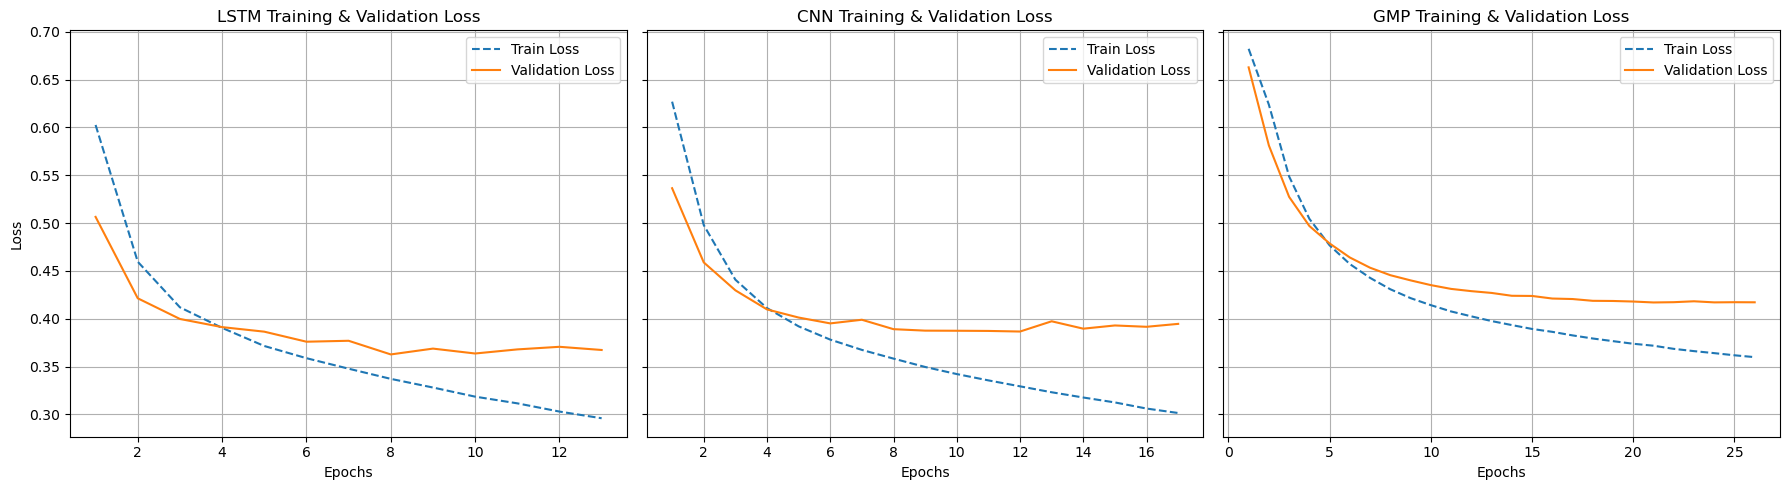

In [94]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, (name, history) in zip(axes, histories.items()):
    epochs = range(1, len(history["train_loss"]) + 1)

    # Train: 점선
    ax.plot(
        epochs,
        history["train_loss"],
        linestyle="--",
        label="Train Loss"
    )

    # Validation: 실선
    ax.plot(
        epochs,
        history["val_loss"],
        linestyle="-",
        label="Validation Loss"
    )

    ax.set_title(f"{name.upper()} Training & Validation Loss")
    ax.set_xlabel("Epochs")
    ax.grid(True)
    ax.legend()

axes[0].set_ylabel("Loss")

plt.tight_layout()
plt.show()

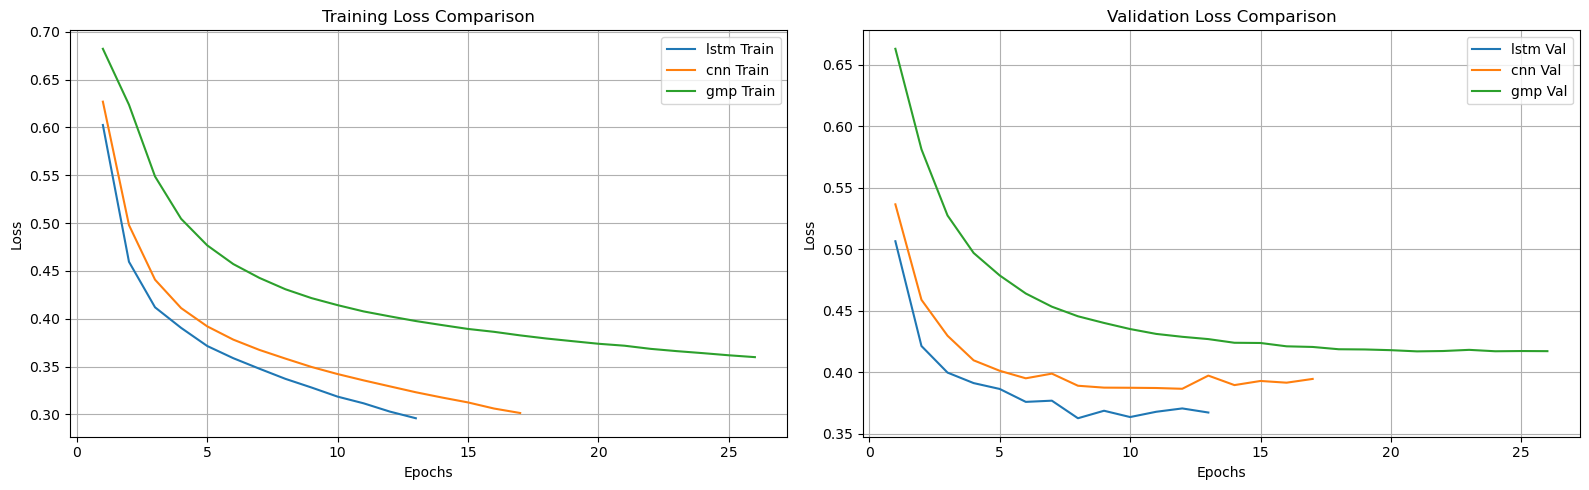

In [95]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# ----- Training Loss -----
for name, history in histories.items():
    axes[0].plot(
        range(1, len(history["train_loss"]) + 1),
        history["train_loss"],
        label=f"{name} Train"
    )

axes[0].set_title("Training Loss Comparison")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()
axes[0].grid(True)

# ----- Validation Loss -----
for name, history in histories.items():
    axes[1].plot(
        range(1, len(history["val_loss"]) + 1),
        history["val_loss"],
        label=f"{name} Val"
    )

axes[1].set_title("Validation Loss Comparison")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [96]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

performance_list = []

for name, result in test_results.items():
    y_true = result["labels"]
    y_pred = result["preds"]

    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)

    performance_list.append({
        "model": name,
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "confusion_matrix": cm
    })

# DataFrame 생성
performance_df = pd.DataFrame(performance_list)

# CSV로 저장 가능
performance_df.to_csv("model_performance.csv", index=False)

print(performance_df)

NameError: name 'test_results' is not defined